# Project No. 1 - MNIST
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
14 de Febrero, 2022
### Description:
Primer proyecto Machine Learning. 5 diferentes modelos que reconocen digitos escritos a mano (0-9)<br>
Link al video: https://drive.google.com/file/d/1xWJ1FJ_ReZiTYXRj_M9kNbkcu9VdtQ9s/view?usp=sharing

## 1. Read Data


In [107]:
#Código complementado con (4)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1, as_frame= False) 

### Structure of the data

In [108]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [109]:
#Data es un arreglo que contiene 70,000 imagenes de 784 pixeles (28*28)
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
mnist.data.shape

(70000, 784)

In [111]:
#Target es un arreglo que contiene 70,000 etiquetas para las imagenes de data
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [112]:
mnist.target.shape

(70000,)

## 2. Data Preprocessing

In [113]:
X, y = mnist["data"], mnist["target"]

In [114]:
X.shape

(70000, 784)

In [115]:
y.shape

(70000,)

In [116]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Visualizando

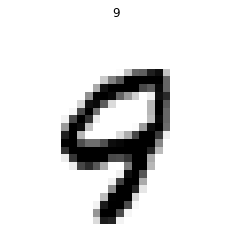

In [117]:
#visualizamos un numero en X y su etiqueta para asegurarnos que funcione
import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = 42069
any_digit_image = X[un_numero].reshape(28,28)
plt.imshow(any_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title(y[un_numero])

plt.show()

### Training y test set:

In [118]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [119]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [152]:
#Normalizando imagen de [0,1] para el modelo de CNN
X_trainCNN = X_train/255.0
X_testCNN = X_test/255.0

#Aqui haremos las variables especialmente para el modelo CNN, ya que se necesita estar en 3 dimensiones, 28 x 28 x 1
#Código complementado con (5)
X_trainCNN = X_trainCNN.reshape(60000,28,28,1)
X_testCNN = X_testCNN.reshape(10000,28,28,1)

In [121]:
y_test.shape

(10000,)

In [122]:
y_train.shape

(60000,)

## 3. Model Creation

### Model #1 Logistic Regression

In [123]:
# Implementado con SAGA por el tamaño de muestra, referenciando (6)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=50.0 / y_train.shape[0], penalty="l1", solver="saga", tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [124]:
from sklearn import svm
SVM = svm.SVC()

### Model #3 Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [126]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

In [153]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Flatten, MaxPooling2D

#Para coincidir tamaños, se convierten las etiquetas en "one hot vectors"
#Código complementado con (5)
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)

CNN = Sequential()
CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3,3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3,3), activation='relu'))

CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))

#Capa Dense tamaño 10 por las 10 categorizaciones finales
#Complementado con activación softmax según (7)
CNN.add(Dense(10, activation='softmax'))

#Complementado con loss según (7)
CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [145]:
CNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

## 4. Training: Adjust Model with Historic Data

### Model #1 Logistic Regression

In [129]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.0008333333333333334, penalty='l1', solver='saga',
                   tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [130]:
SVM.fit(X_train, y_train)

SVC()

### Model #3 Random Forest

In [131]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [132]:
MLP.fit(X_train, y_train)

MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

In [154]:
CNN_H = CNN.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1426 - accuracy: 0.9556 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0277 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0349 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0300 -

## 5. Prediction for New Data

In [155]:
#Para visualizar tablas
import pandas as pd

### Model #1 Logistic Regression

In [156]:
y_predictLR = LR.predict(X_test)

In [157]:
data = [ y_test[:20], y_predictLR[:20]]
pd.DataFrame(data, index = ["Expected label","LR Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
LR Prediction,7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4


### Model #2 Support Vector Machine (SVM)

In [158]:
y_predictSVM = SVM.predict(X_test)

In [159]:
data = [ y_test[:20], y_predictSVM[:20]]
pd.DataFrame(data, index = ["Expected label","SVM Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
SVM Prediction,7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4


### Model #3 Random Forest

In [160]:
y_predictRF = RFC.predict(X_test)

In [161]:
data = [ y_test[:20], y_predictRF[:20]]
pd.DataFrame(data, index = ["Expected label","RF Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
RF Prediction,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4


### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [162]:
y_predictMLP = MLP.predict(X_test)

In [163]:
data = [ y_test[:20], y_predictMLP[:20]]
pd.DataFrame(data, index = ["Expected label","MLP Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
MLP Prediction,7,2,1,0,4,1,4,9,5,4,0,6,9,0,1,5,9,7,9,4


### Model #5 Convolutional Neural Network (CNN)

In [164]:
y_predictCNN = CNN.predict_classes(X_testCNN)

In [165]:
data = [ y_test[:20], y_predictCNN[:20]]
pd.DataFrame(data, index = ["Expected label","CNN Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
CNN Prediction,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4


## 6. Visualization of Results

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Model #1 Logistic Regression

In [167]:
CV_LR = cross_val_score(LR, X_train, y_train, cv=3, scoring = "accuracy")

In [168]:
AS_LR = accuracy_score(y_test,y_predictLR)

### Model #2 Support Vector Machine (SVM)

In [169]:
CV_SVM = cross_val_score(SVM, X_train, y_train, cv=3, scoring = "accuracy")

In [170]:
AS_SVM = accuracy_score(y_test,y_predictSVM)

### Model #3 Random Forest

In [171]:
CV_RF = cross_val_score(RFC, X_train, y_train, cv=3, scoring = "accuracy")

In [172]:
AS_RF = accuracy_score(y_test,y_predictRF)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [173]:
CV_MLP = cross_val_score(MLP, X_train, y_train, cv=3, scoring = "accuracy")

In [174]:
AS_MLP = accuracy_score(y_test,y_predictMLP)

### Model #5 Convolutional Neural Network (CNN)

In [175]:
CV_CNN = CNN.evaluate(X_trainCNN, y_trainCNN)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0144 - accuracy: 0.9959


In [176]:
AS_CNN = CNN.evaluate(X_testCNN, y_testCNN)

313/313 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.9886


## Conclusions

### Tables

In [177]:
#Creación de dataframe con los resultados
models = ["LR","SVM", "RF", "MLP", "CNN"]
AS_values = [AS_LR, AS_SVM, AS_RF, AS_MLP, AS_CNN[1]]
CV_values = [CV_LR, CV_SVM, CV_RF, CV_MLP, [CV_CNN[1],'-','-']]

data = {"Accuracy Scores": AS_values, "Cross Validations": CV_values}
df = pd.DataFrame(data, index = models)

#Separación de arrays de Cross Validations en columnas, referenciando (10)
dfCV = pd.DataFrame(df['Cross Validations'].to_list(), columns=['CV #1','CV #2','CV #3'], index = models)
#Cálculo de promedio de Cross Validations
dfCV.insert(0,'CV AVG', dfCV[['CV #1','CV #2','CV #3']].mean(axis=1, numeric_only=True))

#Concatenación de dataframes con las columnas finales, referenciando (11)
dfAcc = pd.concat([df['Accuracy Scores'], dfCV], axis=1)
dfAcc = dfAcc.style.set_caption("Models' Accuracy Scores and Cross Validations")
dfAcc

,Accuracy Scores,CV AVG,CV #1,CV #2,CV #3
LR,0.922900,0.916300,0.916300,0.912400,0.917600
SVM,0.979200,0.977000,0.977000,0.973800,0.973900
RF,0.948300,0.938450,0.938450,0.938750,0.942900
MLP,0.967900,0.960350,0.960350,0.961250,0.959150
CNN,0.988600,0.995917,0.995917,-,-


### Graphs

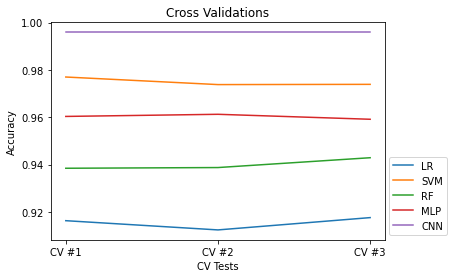

In [178]:
CV_Iter = ["CV #1", "CV #2","CV #3"]

fig, ax = plt.subplots()
ax.plot(CV_Iter, CV_LR, label="LR")
ax.plot(CV_Iter, CV_SVM, label="SVM")
ax.plot(CV_Iter, CV_RF, label="RF")
ax.plot(CV_Iter, CV_MLP, label="MLP")
ax.plot(CV_Iter, np.full((3), CV_CNN[1]), label="CNN")
plt.title("Cross Validations")
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel('CV Tests')
plt.ylabel('Accuracy')

plt.show()

(0.8, 1.0)

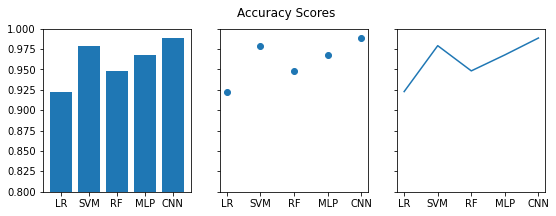

In [179]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(models, AS_values)
axs[1].scatter(models, AS_values)
axs[2].plot(models, AS_values)
fig.suptitle('Accuracy Scores')
plt.ylim([0.8, 1])

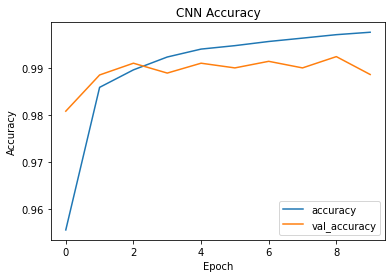

In [180]:
plt.title("CNN Accuracy")
plt.plot(CNN_H.history['accuracy'], label='accuracy')
plt.plot(CNN_H.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### References

>_Se basó en el MLTemplate de MNIST disponible en el curso para este proyecto._

_Para todos los modelos excepto CNN_:
<br>
(1) Cournapeau, D. (2021). scikit-learn, Machine Learning in Python. Retrieved from: https://scikit-learn.org/stable/


_Para CNN_:<br>
(2) Chollet, F. (2022). Clasificacion Básica: Predecir una imagen de moda. Retrieved from: https://www.tensorflow.org/tutorials/keras/classification?hl=es-419#hacer_predicciones

(3) TensorFlow. (2022). Red neuronal convolucional (CNN). Retrieved from: https://www.tensorflow.org/tutorials/images/cnn

(4) Proko. (2021). Why does using X[0] in MNIST classifier code give me an error? Retrieved from: https://stackoverflow.com/a/65506605/13282304


(5) Allibhai, E. (2018). Retrieved from: https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

(6) Mensch, A. (2021). MNIST classification using multinomial logistic + L1. Retrieved from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

(7) SymbolixAU. (2020). CNN with keras, accuracy not improving. Retrieved from: https://stackoverflow.com/a/50083565/13282304

_Para representación de tablas a través de DataFrames:_<br>
(8) Pandas. (2022). DataFrame. Retrieved from: https://pandas.pydata.org/docs/reference/frame.html

(9) Jezrael. (2021). Split a Pandas column of lists into multiple columns. Retrieved from: https://stackoverflow.com/a/35491399/13282304

(10) Pandas. (2022). Merge, join, concatenate and compare. Retrieved from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

_Para gráficas de Matplotlib:_<br>
(11) Hunter, J., Dale, D., Firing, E., Droettboom, M. (2012). Plotting categorical variables. Retrieved from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py